In [3]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from scipy import stats

# Датасет

In [4]:
df = pd.read_csv("supermarket_sales - Sheet1.csv")

In [5]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
df.shape

(1000, 17)

# Анализ

Обратим внимание на некоторые числовые показатели:

*   `Unit price` - цена за единицу товара
*   `Rating` - рейтинг товара

Средний рейтинг `Rating` - $6.97$, что достаточно близко к значению 50% квантиля, представляющего собой медиану выборки. Отдельно стоит проверить выборку рейтингов на нормальность.

Средняя цена за единицу товара `Unit price` - $55.67$, что достаточно близко к значению 50% квантиля, представляющего собой медиану выборки.


In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# Очистка данных

### Объединение даты и времени в один столбец и присвоение этому новому столбцу тип datetime

In [9]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

df.drop(["Date", "Time"], axis = 1, inplace = True)

# Предварительный анализ

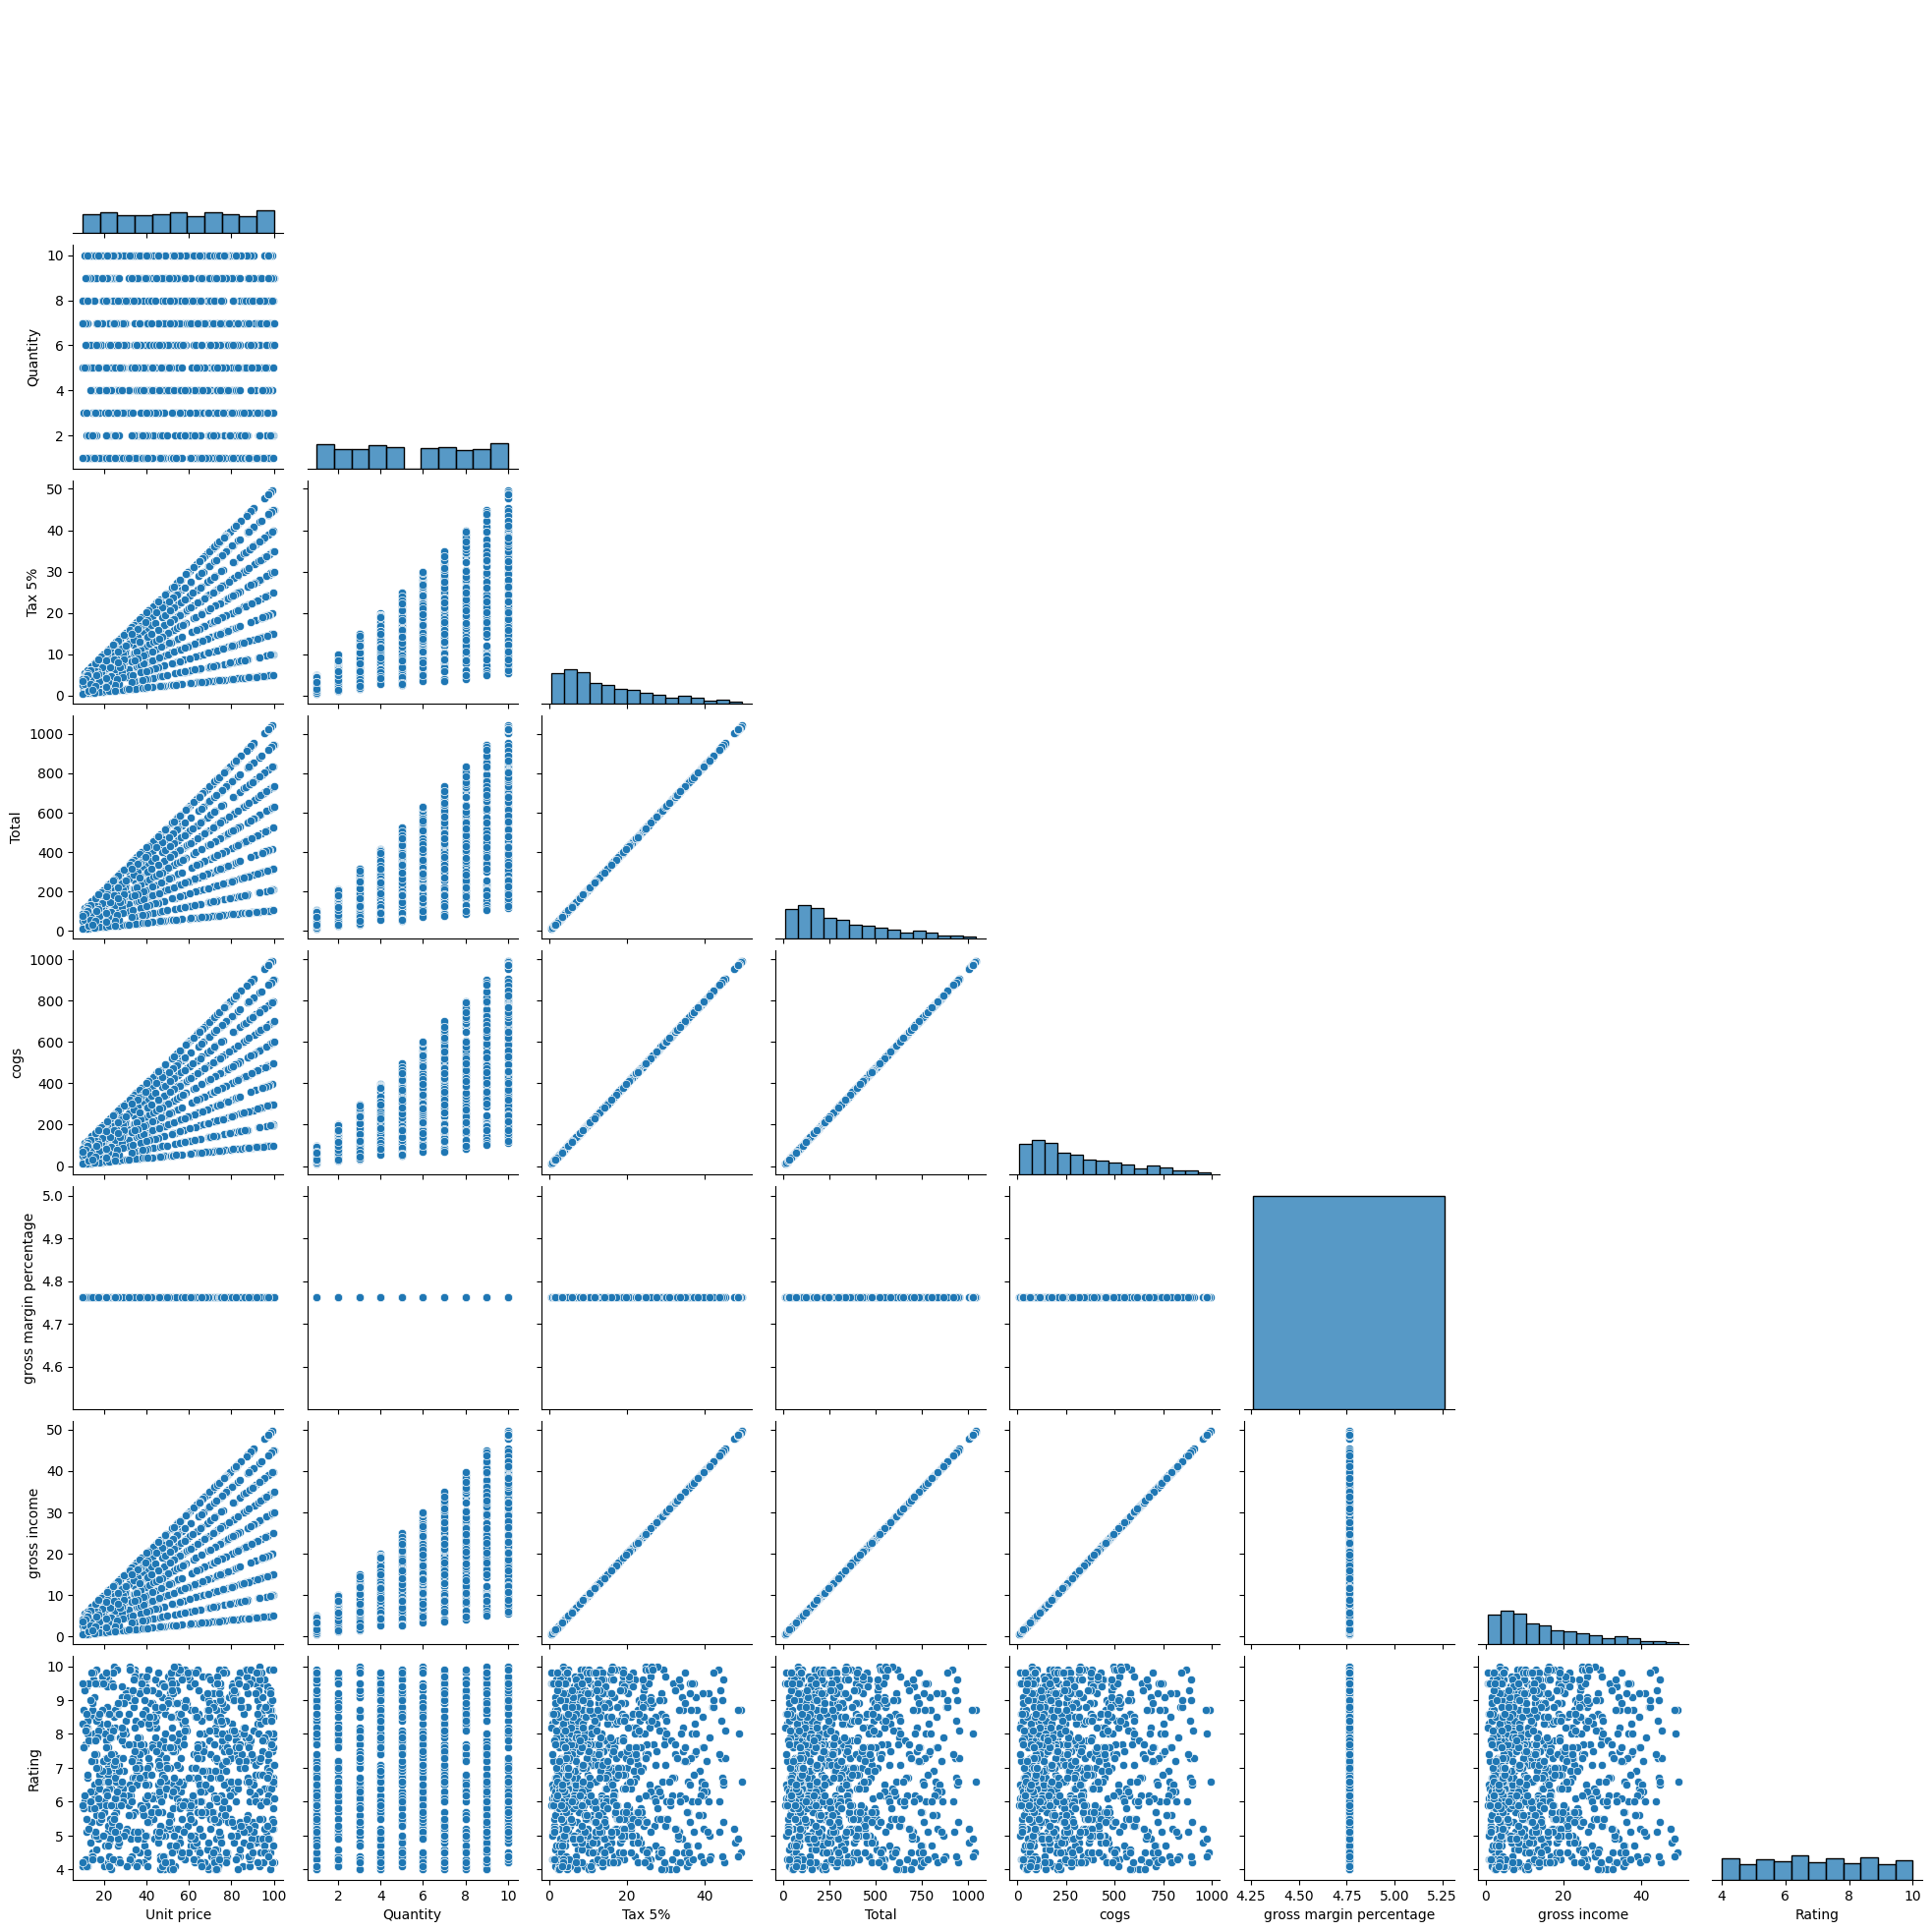

In [10]:
sns.pairplot(df, corner = True)

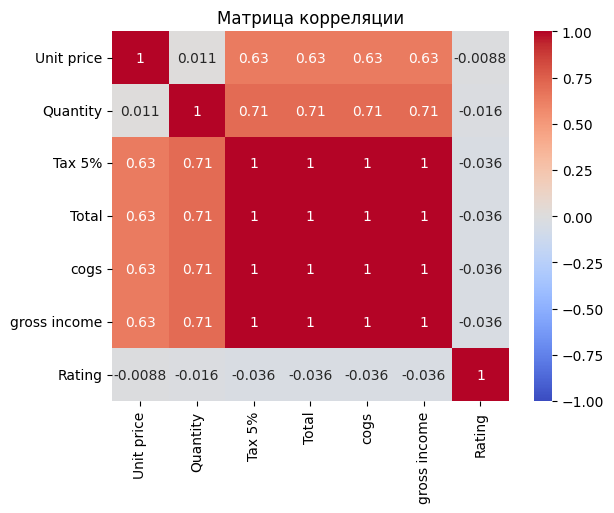

In [11]:
sns.heatmap(df.drop("gross margin percentage", axis = 1).corr(numeric_only = True), annot = True, vmin = -1, vmax = 1, cmap = "coolwarm")

plt.title('Матрица корреляции')

plt.show()

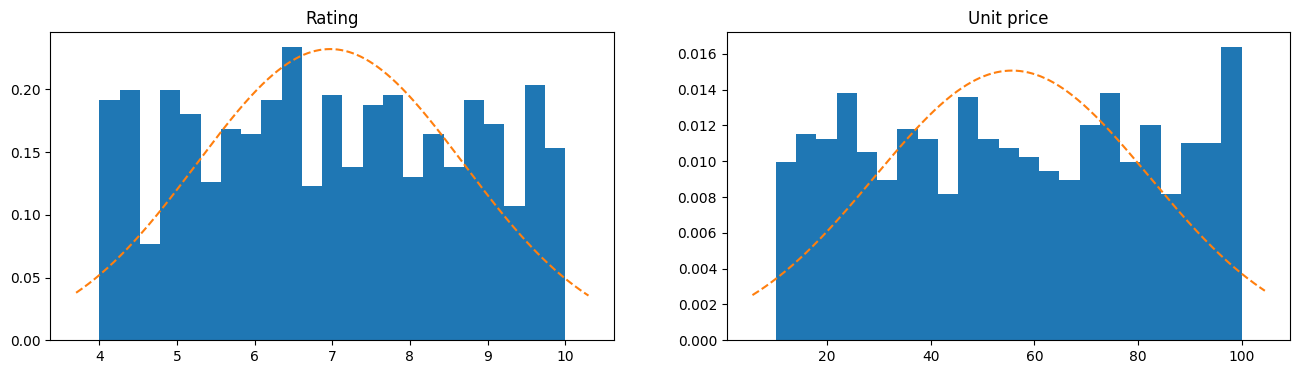

In [61]:
keys = ['Rating', 'Unit price']

fig, axes = plt.subplots(ncols=len(keys))
fig.set_size_inches(8 * len(keys), 4)
axes = axes.flatten()

for key, ax in zip(keys, axes):
    ax.hist(df[key], density=True, bins=23)
    
    loc = df[key].mean()
    scale = df[key].std()
    
    x_left, x_right = ax.get_xlim()
    x = np.linspace(x_left, x_right, 10000)
    y = stats.norm.pdf(x, loc=loc, scale=scale)
    
    ax.plot(x, y, linestyle='dashed')
    ax.set_title(key)

In [62]:
for key in keys:
    print(key)
    
    samples = df[key]
    
    loc = samples.mean()
    scale = samples.std()

    for i in range(1, 4):
        true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
        sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]
        
        print(f'{i} sigma(s)')
        print(f'\ttheoretical:\t{true_value}')
        print(f'\tsample:\t\t{sample_value}')
        
    print()

Rating
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.574
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

Unit price
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.574
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



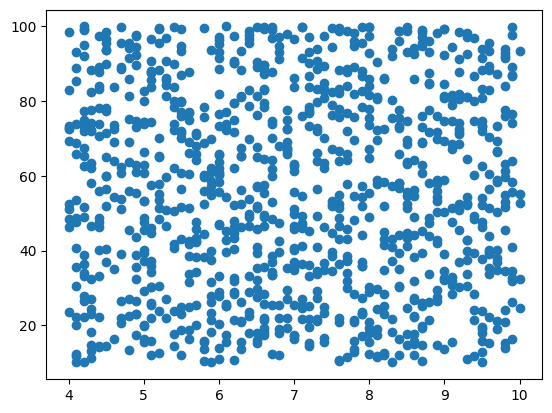

In [64]:
plt.scatter(df['Rating'], df['Unit price'])
plt.show()

## Стастические показатели для выборок



Оценим нормальность выборок также  на основании известных характеристик нормального распределения. В частности:
* Вероятность попасть в интервал от $\mu - \sigma$ до $\mu + \sigma$ равна $0.68$,
* В интервал от $\mu - 2\sigma$ до $\mu + 2\sigma$ — $0.95$,
* В интервал от $\mu - 3\sigma$ до $\mu + 3\sigma$ — $0.997$.

Если рассчётные цифры оказываются близки к теоретическим, то распределения можно признать нормальными. 

На основании такой оценки `Rating` относится к нормальному распределению также, как `Unit price`. 

In [65]:
def sum_of_squares(samples: np.ndarray) -> float:
    return ((samples - samples.mean()) ** 2).sum()

In [66]:
ones = np.ones((1000,1))
x_pot = np.hstack((ones, df['Rating'].values.reshape(1000,1)))

In [67]:
XTX = x_pot.T.dot(x_pot)
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(x_pot.T).dot(df['Unit price'])
z = x_pot.dot(b)
e = df['Unit price'] - z

In [68]:
R = 1 - sum_of_squares(e) / sum_of_squares(np.array(df['Unit price']))
R

7.704463265967298e-05

## Верно ли, что оценка зависит от филиала?

Разделим нашу выборку на три части по филиалам A, B и C.

Проведём дисперсионный анализ для средний значени оценок по выборке. Так как $F < t$, то можно точно сказать, что оценка не зависит от филиала.

In [80]:
def var_analise(df, df1, df2, f):
  all1 = df1.shape[0]
  all2 = df2.shape[0]
  res1_mean = df1[f].mean()
  res2_mean = df2[f].mean()
  res_mean = df[f].mean()
  SS_b = all1 * (res1_mean - res_mean) ** 2 + all2 * (res2_mean - res_mean) ** 2
  SS_w = ((df1[f] - res1_mean) ** 2).sum() + ((df2[f]- res2_mean) ** 2).sum()

  k = 2
  n = all1 + all2
  k1 = k - 1
  k2 = n - k
  sigma2_b = SS_b / k1
  sigma2_w = SS_w / k2
  sigma2_b, sigma2_w

  F = sigma2_b / sigma2_w

  alpha = 0.05

  t = stats.f.ppf(1 - alpha, k1, k2)

  return F>t

In [81]:
df1 = df[df['Branch'] == 'A']
df2 = df[df['Branch'] == 'B']
df3 = df[df['Branch'] == 'C']

In [82]:
var_analise(df, df1, df2, 'Rating')

False

In [83]:
var_analise(df, df1, df3, 'Rating')

False

In [84]:
var_analise(df, df2, df3, 'Rating')

False

## Анализ

In [90]:
n = 1000
m = 1

k1 = m
k2 = n - m - 1

k1, k2

(1, 998)

In [91]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

3.8507933707838875

In [92]:
F = (R / k1) / ((1 - R) / k2)
F

0.07689646785447231

In [93]:
b1 = np.cov(df['Unit price'], df['Rating'], ddof=1)[0, 1] / np.var(df['Unit price'], ddof=1)
b0 = df['Rating'].mean() - b1 * df['Unit price'].mean()

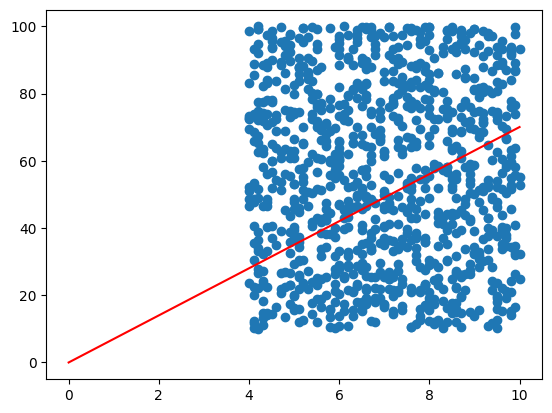

In [94]:
plt.scatter(df['Rating'], df['Unit price'])
x = np.linspace(0, 10, 1000)
y = b0*x + b1
plt.plot(x, y, color = 'r')
plt.show()

## Анализ поведения клиентов

### Анализ популярности продуктовой линейки в разбивке по типу клиента и полу

In [13]:
customer_type_product_popularity = df.groupby(['Customer type', 'Product line'])['Quantity'].sum().reset_index()

customer_type_product_popularity

,Customer type,Product line,Quantity
0,Member,Electronic accessories,429
1,Member,Fashion accessories,439
2,Member,Food and beverages,506
3,Member,Health and beauty,428
4,Member,Home and lifestyle,490
5,Member,Sports and travel,493
6,Normal,Electronic accessories,542
7,Normal,Fashion accessories,463
8,Normal,Food and beverages,446
9,Normal,Health and beauty,426


In [14]:
customer_type_product_popularity.pivot_table(index = "Product line",columns = "Customer type",values = "Quantity",
).astype(int).style.background_gradient(cmap = "RdYlGn", axis = None)

Customer type,Member,Normal
Product line,,
Electronic accessories,429,542
Fashion accessories,439,463
Food and beverages,506,446
Health and beauty,428,426
Home and lifestyle,490,421
Sports and travel,493,427


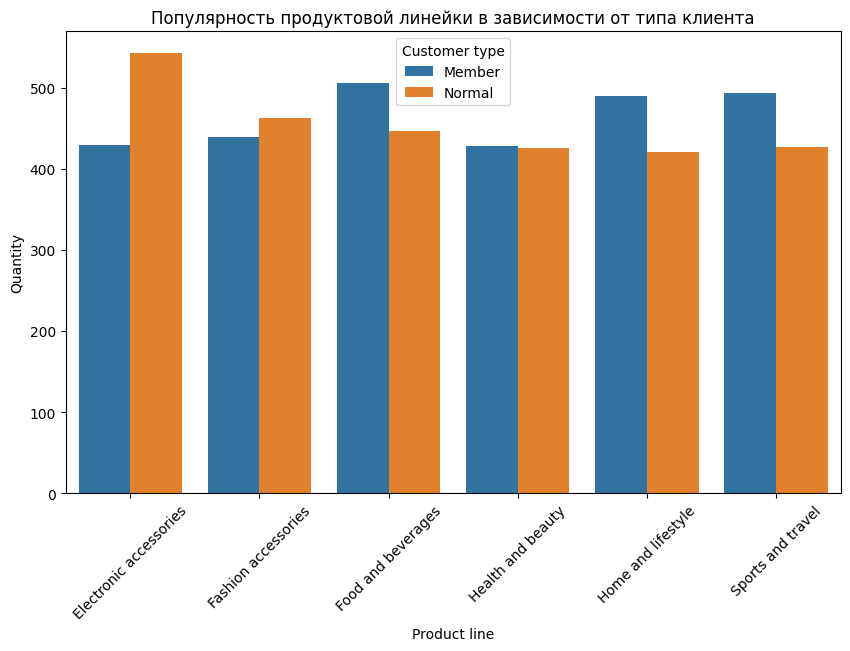

In [15]:
plt.figure(figsize=(10,6))

sns.barplot(x='Product line', y='Quantity', hue='Customer type', data=customer_type_product_popularity)
plt.title('Популярность продуктовой линейки в зависимости от типа клиента')
plt.xticks(rotation=45)

plt.show()

In [16]:
gender_product_popularity = df.groupby(['Gender', 'Product line'])['Quantity'].sum().reset_index()

gender_product_popularity

,Gender,Product line,Quantity
0,Female,Electronic accessories,488
1,Female,Fashion accessories,530
2,Female,Food and beverages,514
3,Female,Health and beauty,343
4,Female,Home and lifestyle,498
5,Female,Sports and travel,496
6,Male,Electronic accessories,483
7,Male,Fashion accessories,372
8,Male,Food and beverages,438
9,Male,Health and beauty,511


In [17]:
gender_product_popularity.pivot_table(index = "Product line",columns = "Gender",values = "Quantity",
).astype(int).style.background_gradient(cmap = "RdYlGn")

Gender,Female,Male
Product line,,
Electronic accessories,488,483
Fashion accessories,530,372
Food and beverages,514,438
Health and beauty,343,511
Home and lifestyle,498,413
Sports and travel,496,424


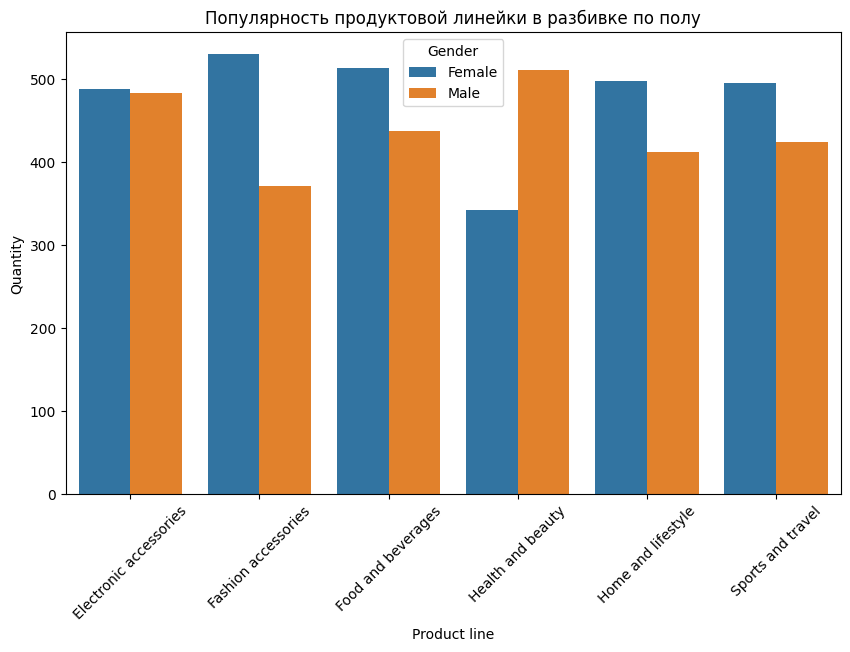

In [18]:
plt.figure(figsize=(10,6))

sns.barplot(x='Product line', y='Quantity', hue='Gender', data=gender_product_popularity)
plt.title('Популярность продуктовой линейки в разбивке по полу')
plt.xticks(rotation=45)
plt.show()

### Определение времени пиковых покупок по дням и часам

In [19]:
df = df.assign(Day = df['Datetime'].dt.day_name(), Hour = df['Datetime'].dt.hour)

In [20]:
sales_by_day = df.groupby('Day')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

sales_by_day

,Day,Total
2,Saturday,56120.8095
5,Tuesday,51482.2455
4,Thursday,45349.2480
3,Sunday,44457.8925
0,Friday,43926.3405
6,Wednesday,43731.1350
1,Monday,37899.0780


C:\Users\User\AppData\Local\Temp\ipykernel_13232\2568236191.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Day', y='Total', data=sales_by_day, palette='viridis')


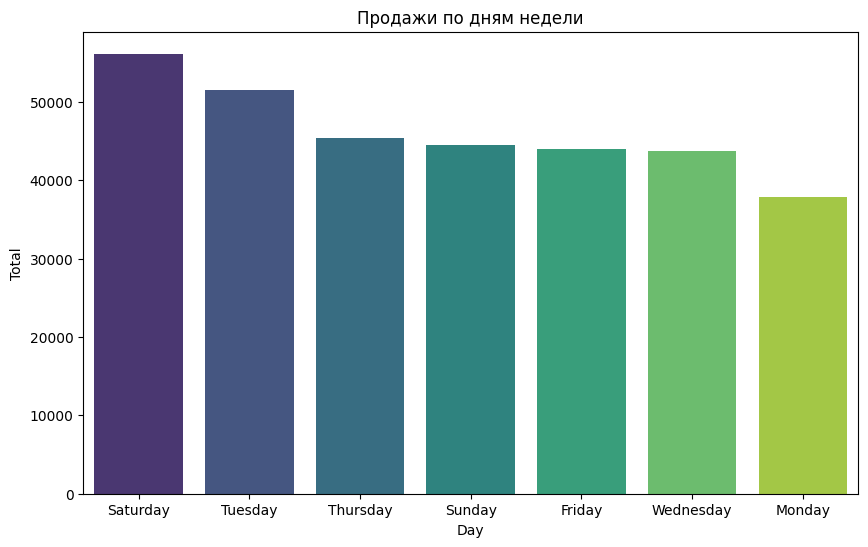

In [21]:
plt.figure(figsize=(10,6))

sns.barplot(x='Day', y='Total', data=sales_by_day, palette='viridis')
plt.title('Продажи по дням недели')
plt.show()

In [22]:
sales_by_hour = df.groupby('Hour')['Total'].sum().reset_index().sort_values(by='Hour', ascending=False)

sales_by_hour

,Hour,Total
10,20,22969.5270
9,19,39699.5130
8,18,26030.3400
7,17,24445.2180
6,16,25226.3235
5,15,31179.5085
4,14,30828.3990
3,13,34723.2270
2,12,26065.8825
1,11,30377.3295


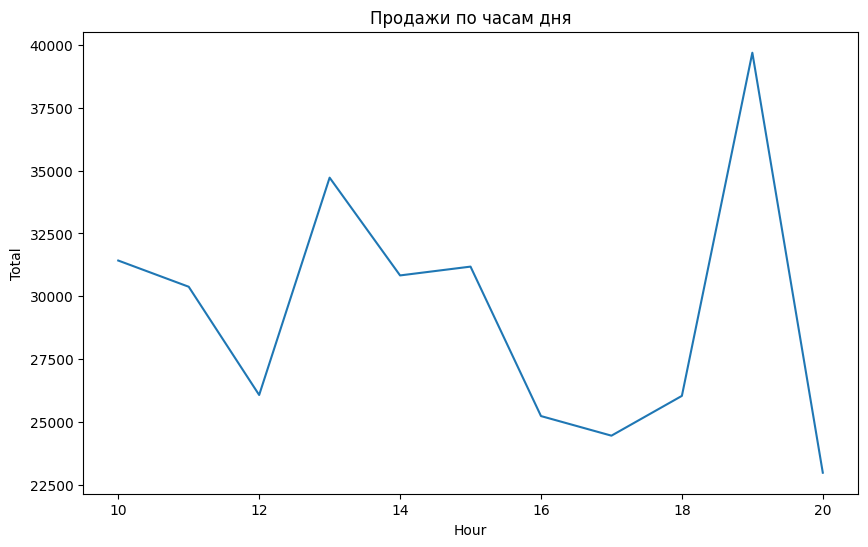

In [23]:
plt.figure(figsize=(10,6))

sns.lineplot(x='Hour', y='Total', data=sales_by_hour)
plt.title('Продажи по часам дня')
plt.show()

### Сочетание типа клиента, пола и времени для более глубокого понимания

In [24]:
customer_behavior_analysis = (df.groupby(['Customer type', 'Gender', 'Day', 'Hour'])['Total']
                              .sum().reset_index().sort_values(by='Total', ascending=False))

customer_behavior_analysis

,Customer type,Gender,Day,Hour,Total
179,Normal,Female,Saturday,19,4171.0200
58,Member,Female,Tuesday,15,3963.4350
62,Member,Female,Tuesday,19,3295.9605
191,Normal,Female,Thursday,10,3188.0730
144,Member,Male,Wednesday,15,3076.4055
...,...,...,...,...,...
168,Normal,Female,Monday,18,49.7700
294,Normal,Male,Wednesday,16,44.5935
154,Normal,Female,Friday,15,41.3910
290,Normal,Male,Wednesday,12,32.1405


In [25]:
customer_behavior = customer_behavior_analysis.pivot_table(index="Day",columns="Hour",values="Total"
                                     ).style.format("{:.2f}").background_gradient(cmap="RdYlGn", axis=None)
customer_behavior

Hour,10,11,12,13,14,15,16,17,18,19,20
Day,,,,,,,,,,,
Friday,1417.92,662.32,539.81,1706.08,1722.09,924.02,773.09,473.35,793.82,1368.98,1030.62
Monday,934.60,718.16,1181.53,939.66,501.09,1285.34,1172.75,1059.75,701.52,649.66,595.66
Saturday,824.00,1371.73,1227.71,1422.41,1335.47,1157.01,953.38,1689.94,1684.69,2279.35,796.27
Sunday,1016.84,1578.92,1182.05,1289.89,1169.03,670.46,560.31,1042.34,909.32,1490.91,798.85
Thursday,1721.31,1100.72,641.02,648.56,1368.51,1078.27,1081.80,1014.15,755.39,796.27,1508.41
Tuesday,1146.37,1305.97,934.77,990.63,1238.29,1755.05,957.86,743.88,604.40,2299.67,893.67
Wednesday,794.33,1251.24,809.58,1683.59,803.14,1213.98,807.41,1033.76,1058.44,1040.04,927.61


<Axes: xlabel='Day', ylabel='Total'>

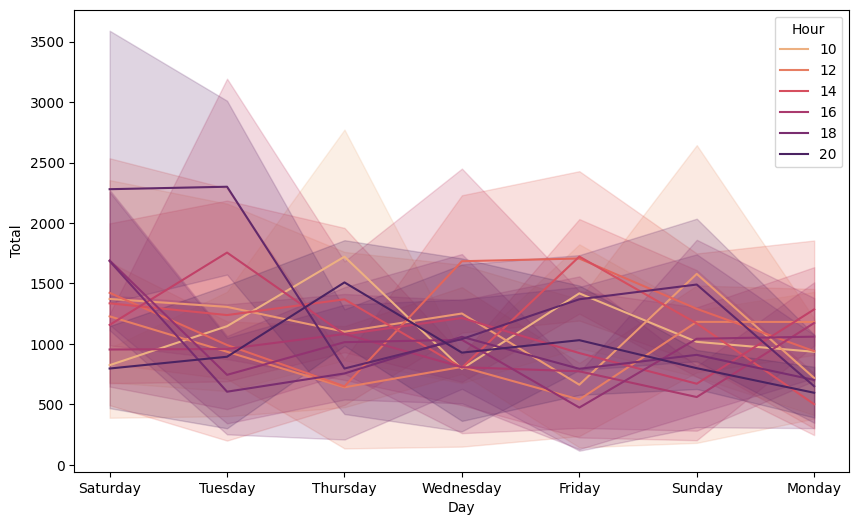

In [26]:
plt.figure(figsize=(10,6))
sns.lineplot(data=customer_behavior_analysis, x="Day", y="Total", hue="Hour", palette='flare')

## Эффективность работы филиала

### Показатели продаж в разбивке по филиалам

In [27]:
sales_per_branch = df.groupby('Branch')['Total'].sum().reset_index().sort_values(by='Total', ascending=False)

sales_per_branch

,Branch,Total
2,C,110568.7065
0,A,106200.3705
1,B,106197.6720


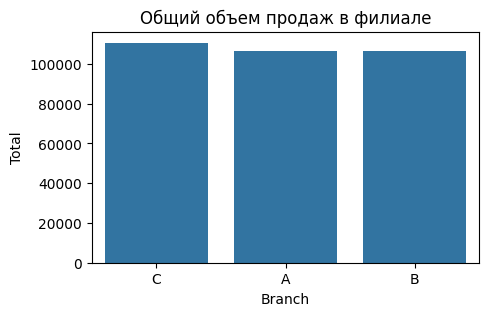

In [28]:
plt.figure(figsize=(5, 3))

sns.barplot(x='Branch', y='Total', data=sales_per_branch)
plt.title('Общий объем продаж в филиале')
plt.show()

### Удовлетворенность клиентов (рейтинг) в разбивке по отраслям

In [29]:
ratings_per_branch = df.groupby('Branch')['Rating'].mean().reset_index().sort_values(by='Rating', ascending=False)

ratings_per_branch

,Branch,Rating
2,C,7.072866
0,A,7.027059
1,B,6.818072


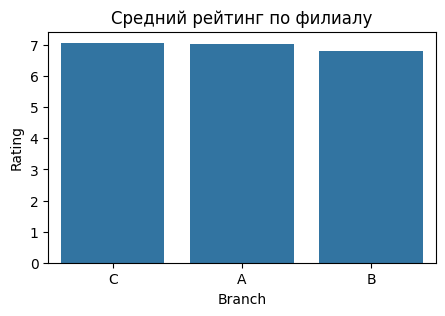

In [30]:
plt.figure(figsize=(5, 3))

sns.barplot(x='Branch', y='Rating', data=ratings_per_branch)
plt.title('Средний рейтинг по филиалу')
plt.show()

### Сравнение валового дохода по отраслям

In [31]:
gross_income_per_branch = (df.groupby('Branch')['gross income']
                           .sum().reset_index().sort_values(by='gross income', ascending=False))
gross_income_per_branch

,Branch,gross income
2,C,5265.1765
0,A,5057.1605
1,B,5057.0320


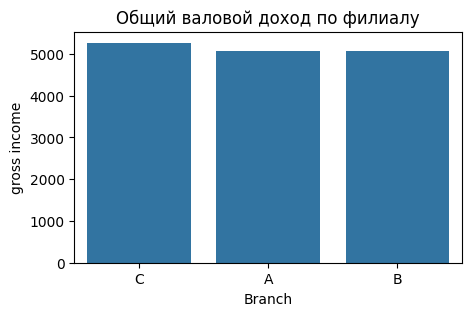

In [32]:
plt.figure(figsize=(5, 3))

sns.barplot(x='Branch', y='gross income', data=gross_income_per_branch)
plt.title('Общий валовой доход по филиалу')
plt.show()

### Объединение данных о продажах, рейтингах и валовом доходе для получения полного представления

In [33]:
branch_performance = pd.merge(sales_per_branch, ratings_per_branch, on='Branch')
branch_performance = pd.merge(branch_performance, gross_income_per_branch, on='Branch')

branch_performance.columns = ['Branch', 'Total Sales', 'Average Rating', 'Total Gross Income']
branch_performance = branch_performance.sort_values(by='Total Sales', ascending=False)
branch_performance

,Branch,Total Sales,Average Rating,Total Gross Income
0,C,110568.7065,7.072866,5265.1765
1,A,106200.3705,7.027059,5057.1605
2,B,106197.6720,6.818072,5057.0320


### Зависимость показателей от линейки продуктов и типа клиента

#### Продажи по продуктовым линейкам для каждого филиала

In [34]:
product_sales_per_branch = (df.groupby(['Branch', 'Product line'])['Total']
                            .sum().reset_index().sort_values(by=['Branch', 'Total'], ascending=False))

product_sales_per_branch

,Branch,Product line,Total
14,C,Food and beverages,23766.8550
13,C,Fashion accessories,21560.0700
12,C,Electronic accessories,18968.9745
15,C,Health and beauty,16615.3260
17,C,Sports and travel,15761.9280
16,C,Home and lifestyle,13895.5530
11,B,Sports and travel,19988.1990
9,B,Health and beauty,19980.6600
10,B,Home and lifestyle,17549.1645
6,B,Electronic accessories,17051.4435


In [35]:
product_sales_per_branch.pivot_table(index="Product line",columns="Branch",values="Total"
                                     ).style.format("{:.2f}").background_gradient(cmap="RdYlGn", axis=None)

Branch,A,B,C
Product line,,,
Electronic accessories,18317.11,17051.44,18968.97
Fashion accessories,16332.51,16413.32,21560.07
Food and beverages,17163.10,15214.89,23766.85
Health and beauty,12597.75,19980.66,16615.33
Home and lifestyle,22417.20,17549.16,13895.55
Sports and travel,19372.70,19988.20,15761.93


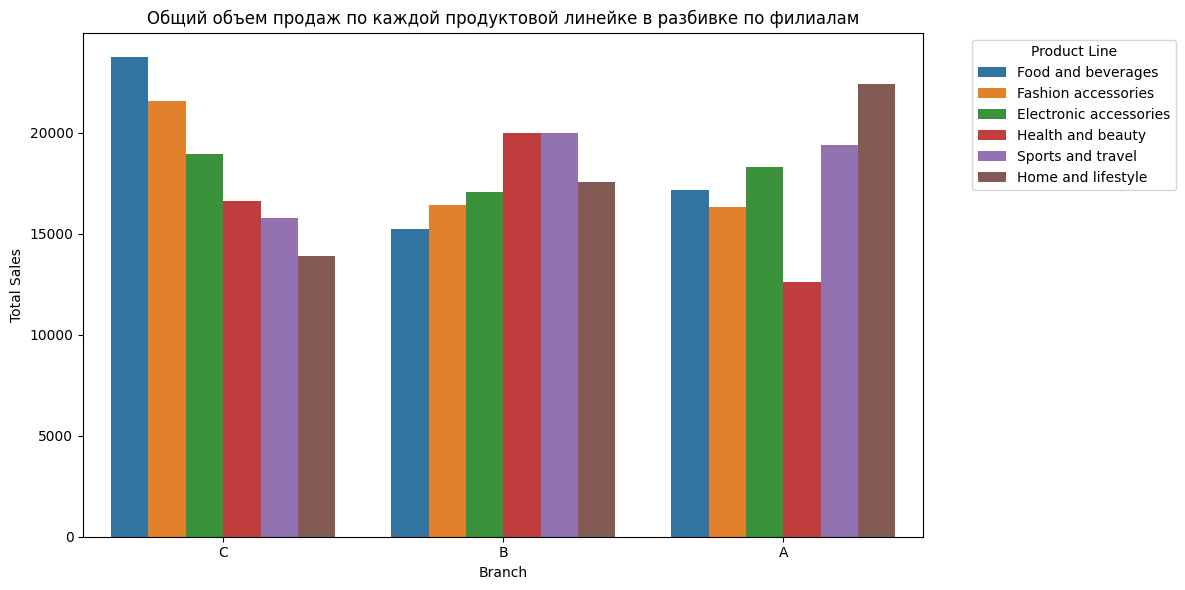

In [36]:
plt.figure(figsize=(12,6))

sns.barplot(x='Branch', y='Total', hue='Product line', data=product_sales_per_branch)

plt.title('Общий объем продаж по каждой продуктовой линейке в разбивке по филиалам')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### Сравнение в зависимости от типа клиента

In [37]:
customer_type_sales_per_branch = (df.groupby(['Branch', 'Customer type'])['Total'].sum().reset_index()
                                  .sort_values(by=['Branch', 'Total'], ascending=False))

customer_type_sales_per_branch

,Branch,Customer type,Total
4,C,Member,56881.2825
5,C,Normal,53687.4240
2,B,Member,53704.6860
3,B,Normal,52492.9860
0,A,Member,53637.4755
1,A,Normal,52562.8950


In [38]:
customer_type_sales_per_branch.pivot_table(index = "Customer type",columns = "Branch",values = "Total",
).style.format("{:.2f}").background_gradient(cmap = "RdYlGn", axis = None)

Branch,A,B,C
Customer type,,,
Member,53637.48,53704.69,56881.28
Normal,52562.89,52492.99,53687.42


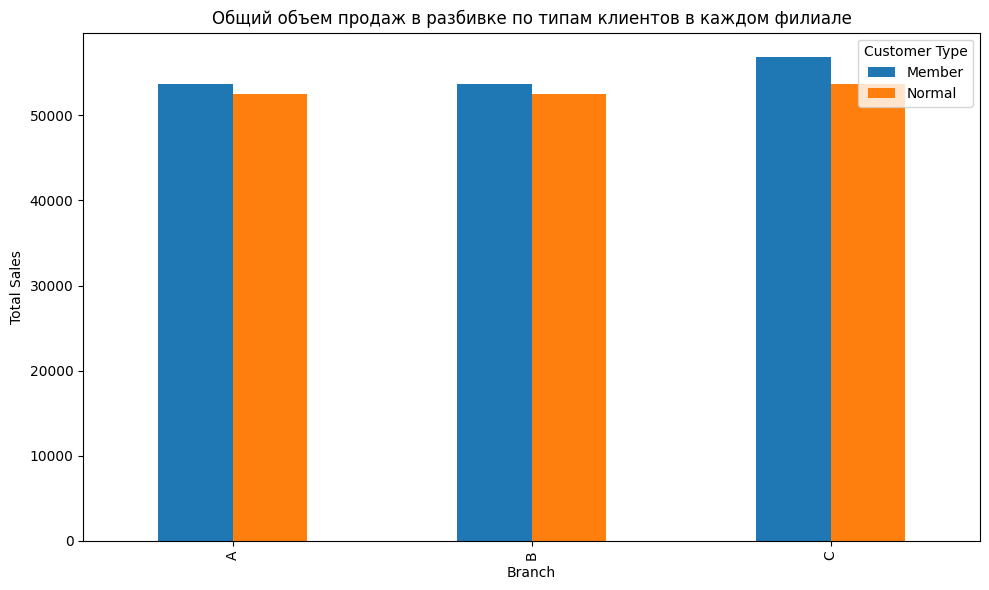

In [39]:
customer_type_pivot = customer_type_sales_per_branch.pivot(index='Branch', columns='Customer type', values='Total')

customer_type_pivot.plot(kind='bar', figsize=(10,6))

plt.title('Общий объем продаж в разбивке по типам клиентов в каждом филиале')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()

## Удовлетворенность клиентов

### Классификация оценок клиентов по категориям

In [40]:
df = df.assign(Satisfaction_Level = np.where(df["Rating"] <= 4, "Low", 
np.where((df["Rating"] >= 5) & (df["Rating"] <= 7), "Medium", "High"))
).rename(columns = {"Satisfaction_Level": "Satisfaction Level"})

df[['Rating', 'Satisfaction Level']]

,Rating,Satisfaction Level
0,9.1,High
1,9.6,High
2,7.4,High
3,8.4,High
4,5.3,Medium
...,...,...
995,6.2,Medium
996,4.4,High
997,7.7,High
998,4.1,High


### Изучение взаимосвязей между показателями и рейтингами

#### Линия продуктов и уровень удовлетворенности 

In [41]:
product_line_satisfaction = df.groupby(['Product line', 'Satisfaction Level'])['Invoice ID'].count().reset_index()

product_line_satisfaction.rename(columns={'Invoice ID': 'Count'}, inplace=True)
product_line_satisfaction = product_line_satisfaction.sort_values(by='Count', ascending=False)

product_line_satisfaction

,Product line,Satisfaction Level,Count
6,Food and beverages,High,113
3,Fashion accessories,High,111
12,Home and lifestyle,High,106
0,Electronic accessories,High,103
9,Health and beauty,High,100
14,Sports and travel,High,90
16,Sports and travel,Medium,75
2,Electronic accessories,Medium,66
5,Fashion accessories,Medium,65
8,Food and beverages,Medium,57


In [42]:
product_line_satisfaction.pivot_table(index = "Product line",columns = "Satisfaction Level",values = "Count",
).replace(np.NAN, 0).style.format("{:.0f}").background_gradient(cmap="RdYlGn", axis=None)

Satisfaction Level,High,Low,Medium
Product line,,,
Electronic accessories,103,1,66
Fashion accessories,111,2,65
Food and beverages,113,4,57
Health and beauty,100,3,49
Home and lifestyle,106,0,54
Sports and travel,90,1,75


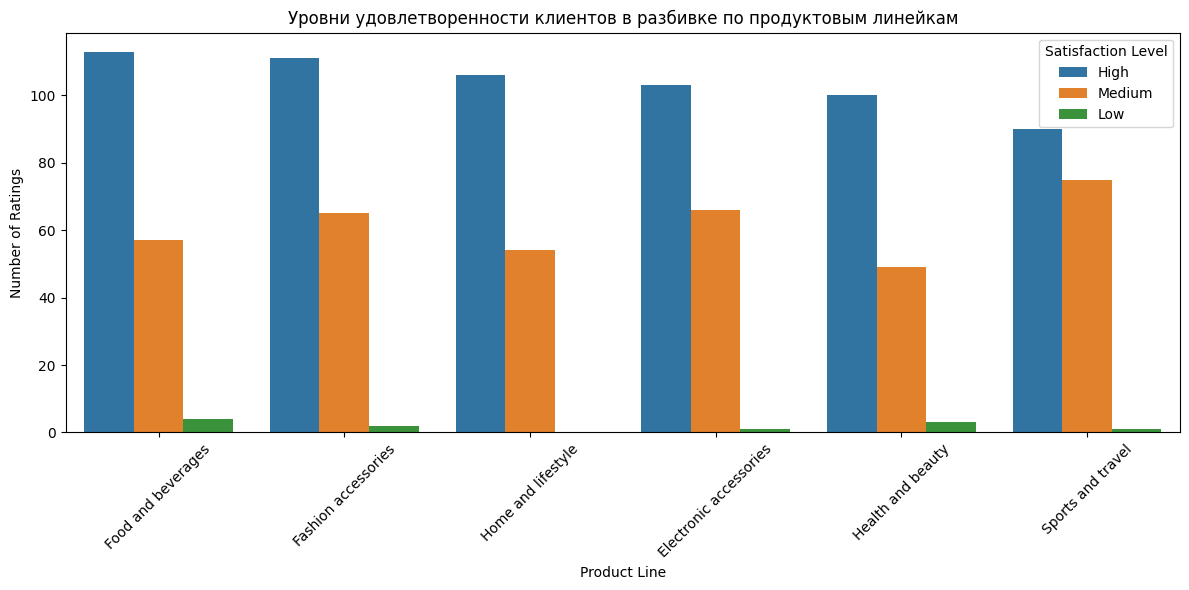

In [43]:
plt.figure(figsize=(12,6))

sns.barplot(x='Product line', y='Count', hue='Satisfaction Level', data=product_line_satisfaction)
plt.title('Уровни удовлетворенности клиентов в разбивке по продуктовым линейкам')
plt.ylabel('Number of Ratings')
plt.xlabel('Product Line')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

#### Способ оплаты и уровень удовлетворенности 

In [44]:
payment_satisfaction = df.groupby(['Payment', 'Satisfaction Level'])['Invoice ID'].count().reset_index()

payment_satisfaction.rename(columns={'Invoice ID': 'Count'}, inplace=True)
payment_satisfaction = payment_satisfaction.sort_values(by='Count', ascending=False)

payment_satisfaction

,Payment,Satisfaction Level,Count
6,Ewallet,High,212
0,Cash,High,209
3,Credit card,High,202
2,Cash,Medium,133
8,Ewallet,Medium,129
5,Credit card,Medium,104
4,Credit card,Low,5
7,Ewallet,Low,4
1,Cash,Low,2


In [45]:
payment_satisfaction.pivot_table(index = "Payment",columns = "Satisfaction Level",values = "Count",

).style.format("{:.0f}").background_gradient(cmap="RdYlGn", axis=None)

Satisfaction Level,High,Low,Medium
Payment,,,
Cash,209,2,133
Credit card,202,5,104
Ewallet,212,4,129


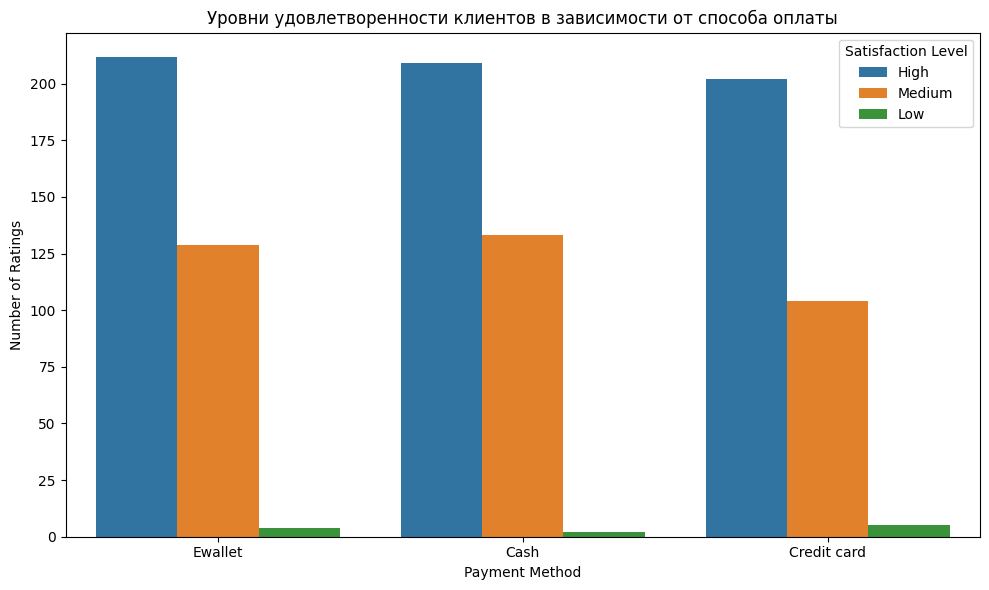

In [46]:
plt.figure(figsize=(10,6))

sns.barplot(x='Payment', y='Count', hue='Satisfaction Level', data=payment_satisfaction)
plt.title('Уровни удовлетворенности клиентов в зависимости от способа оплаты')
plt.ylabel('Number of Ratings')
plt.xlabel('Payment Method')
plt.tight_layout()

plt.show()

## Анализ по продуктам

### Анализ объема продаж по продуктовым линейкам

In [47]:
product_sales_volume = df.groupby('Product line')['Quantity'].sum().sort_values(ascending=False).reset_index()

product_sales_volume

,Product line,Quantity
0,Electronic accessories,971
1,Food and beverages,952
2,Sports and travel,920
3,Home and lifestyle,911
4,Fashion accessories,902
5,Health and beauty,854


C:\Users\User\AppData\Local\Temp\ipykernel_13232\1713687069.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_sales_volume, x="Product line", y="Quantity", palette='viridis')


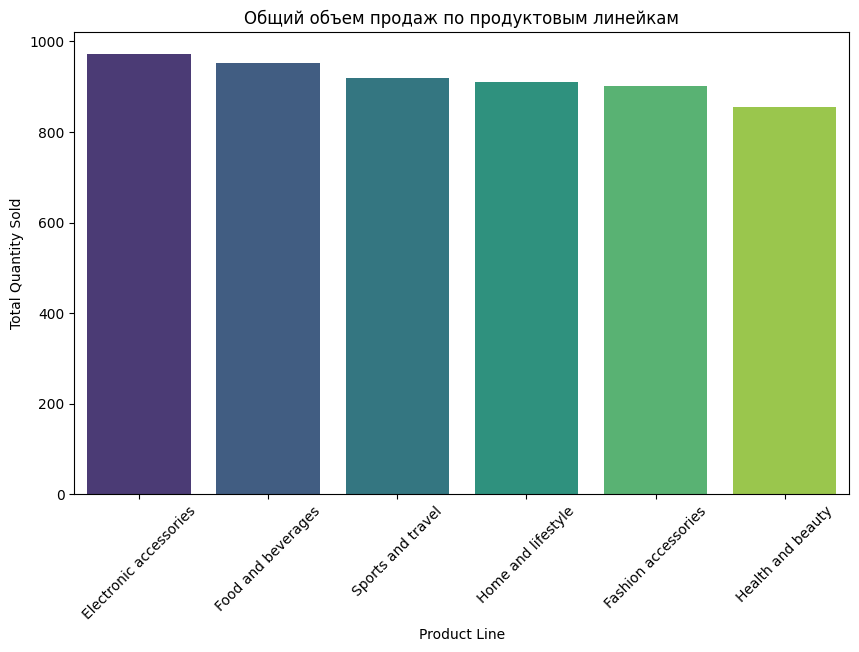

In [48]:
plt.figure(figsize=(10,6))

sns.barplot(data = product_sales_volume, x="Product line", y="Quantity", palette='viridis')
plt.title('Общий объем продаж по продуктовым линейкам')
plt.xlabel('Product Line')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)

plt.show()

### Валовой доход в разбивке по продуктовым линейкам

In [49]:
product_gross_income = df.groupby('Product line')['gross income'].sum().sort_values(ascending=False).reset_index()

product_gross_income

,Product line,gross income
0,Food and beverages,2673.5640
1,Sports and travel,2624.8965
2,Electronic accessories,2587.5015
3,Fashion accessories,2585.9950
4,Home and lifestyle,2564.8530
5,Health and beauty,2342.5590


C:\Users\User\AppData\Local\Temp\ipykernel_13232\4048497081.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = product_gross_income, x="Product line", y="gross income", palette='viridis')


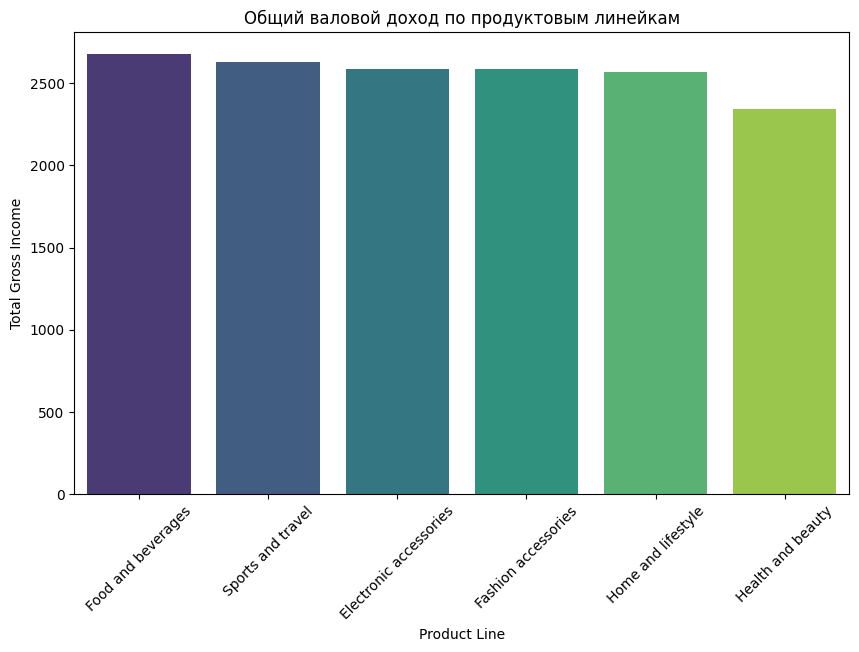

In [50]:
plt.figure(figsize=(10,6))

sns.barplot(data = product_gross_income, x="Product line", y="gross income", palette='viridis')
plt.title('Общий валовой доход по продуктовым линейкам')
plt.xlabel('Product Line')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)

plt.show()

### Средний валовой доход в разбивке по продуктовым линейкам

In [51]:
avg_gross_income_per_sale = df.groupby('Product line')['gross income'].mean().sort_values(ascending=False).reset_index()

avg_gross_income_per_sale

,Product line,gross income
0,Home and lifestyle,16.030331
1,Sports and travel,15.812630
2,Health and beauty,15.411572
3,Food and beverages,15.365310
4,Electronic accessories,15.220597
5,Fashion accessories,14.528062


C:\Users\User\AppData\Local\Temp\ipykernel_13232\1544904092.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = avg_gross_income_per_sale, x="Product line", y="gross income", palette='viridis')


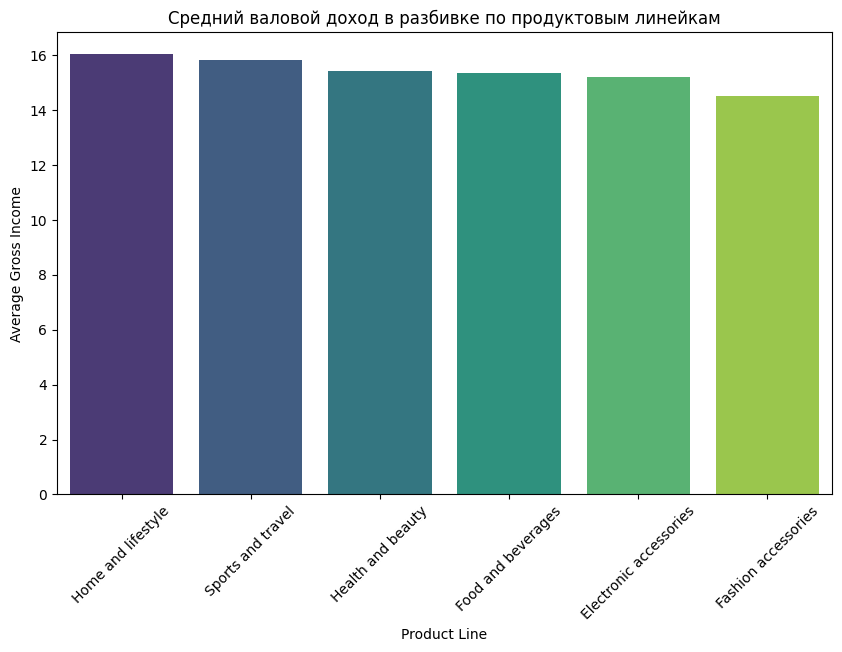

In [52]:
plt.figure(figsize=(10,6))

sns.barplot(data = avg_gross_income_per_sale, x="Product line", y="gross income", palette='viridis')
plt.title('Средний валовой доход в разбивке по продуктовым линейкам')
plt.xlabel('Product Line')
plt.ylabel('Average Gross Income')
plt.xticks(rotation=45)

plt.show()

### Корреляция между объемом продаж и валовым доходом

In [53]:
product_analysis = df.groupby('Product line').agg({'Quantity': 'sum', 'gross income': 'sum'}).reset_index()

product_analysis

,Product line,Quantity,gross income
0,Electronic accessories,971,2587.5015
1,Fashion accessories,902,2585.9950
2,Food and beverages,952,2673.5640
3,Health and beauty,854,2342.5590
4,Home and lifestyle,911,2564.8530
5,Sports and travel,920,2624.8965


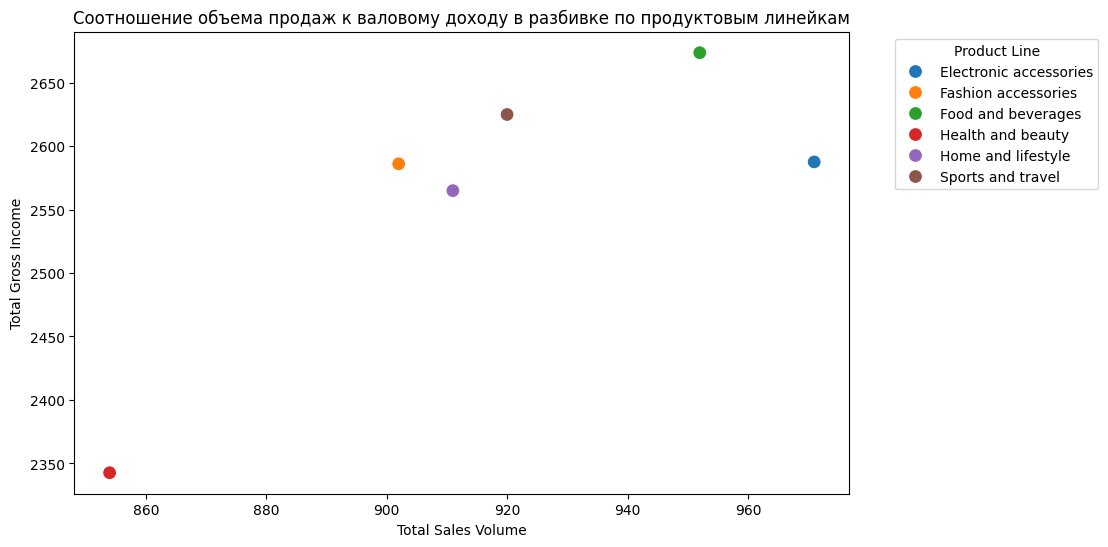

In [54]:
plt.figure(figsize=(10,6))

sns.scatterplot(data=product_analysis, x='Quantity', y='gross income', hue="Product line", s = 100)
plt.title('Соотношение объема продаж к валовому доходу в разбивке по продуктовым линейкам')
plt.xlabel('Total Sales Volume')
plt.ylabel('Total Gross Income')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Сравнение продуктовой линейки по типу клиента

In [55]:
product_customer_analysis = df.groupby(['Product line', 'Customer type']).agg({'Quantity': 'sum', 'gross income': 'sum'}).unstack()

product_customer_analysis

Quantity        gross income           
Customer type            Member Normal       Member     Normal
Product line                                                  
Electronic accessories      429    542    1166.5950  1420.9065
Fashion accessories         439    463    1253.5220  1332.4730
Food and beverages          506    446    1493.2200  1180.3440
Health and beauty           428    426    1230.0495  1112.5095
Home and lifestyle          490    421    1332.2870  1232.5660
Sports and travel           493    427    1344.4905  1280.4060

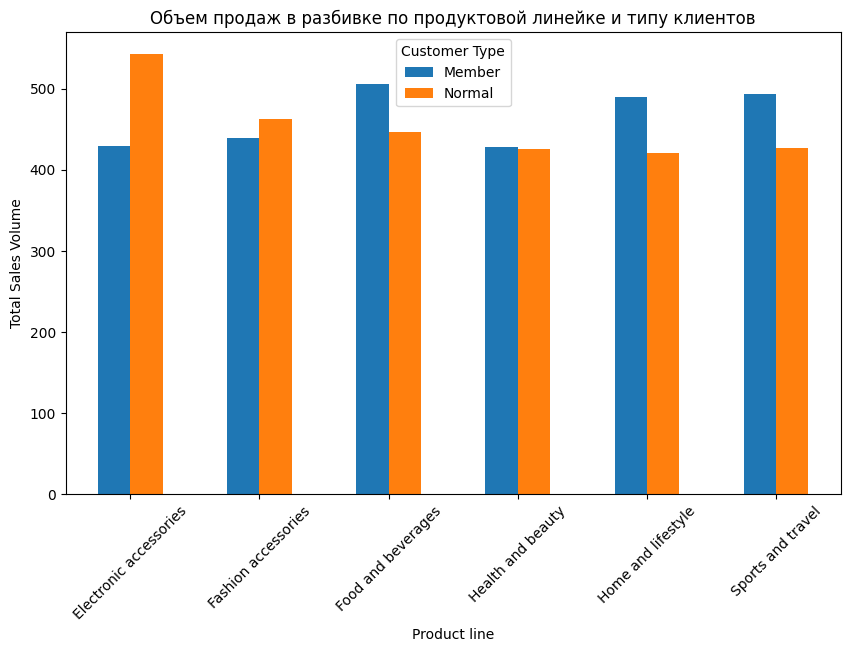

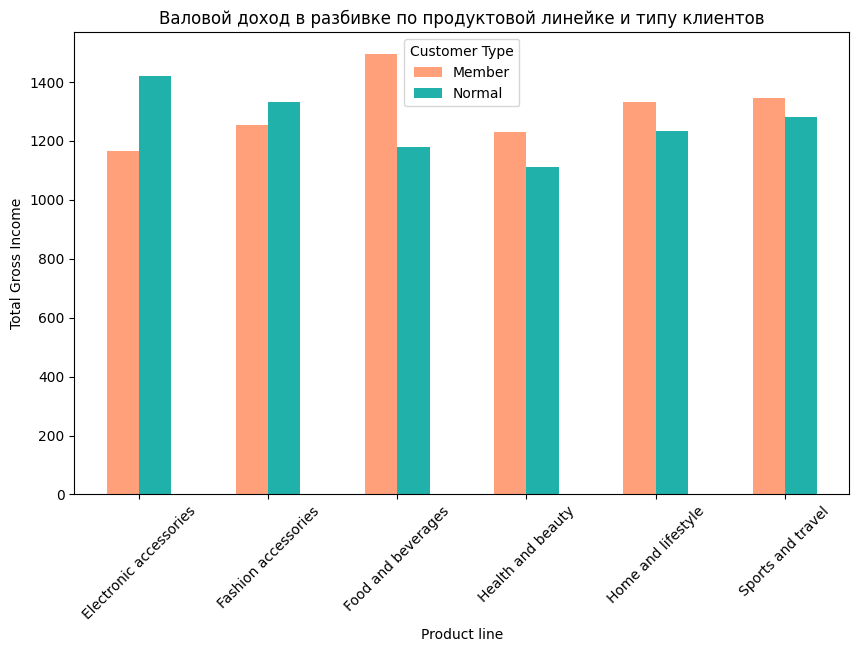

In [56]:
product_customer_analysis['Quantity'].plot(kind='bar', figsize=(10,6))

plt.title('Объем продаж в разбивке по продуктовой линейке и типу клиентов')
plt.ylabel('Total Sales Volume')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()

product_customer_analysis['gross income'].plot(kind='bar', figsize=(10,6), color=['#FFA07A', '#20B2AA'])

plt.title('Валовой доход в разбивке по продуктовой линейке и типу клиентов')
plt.ylabel('Total Gross Income')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.show()

### Выводы

1. Суббота - самый прибыльный день для магазина.
2. Женщины покупают больше косметических товаров, когда мужчины больше товаров, относящихся к здоровью.
3. Больше всего прибыли идет под конец рабочего дня магазинов.
4. Филиалы почти не различаются по выручке.